In [1]:
import numpy as np
import math
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', UserWarning)
from matplotlib import patches

In [2]:
normal_d = np.array([1,2,3,4,5,6])
boo_d = np.array([-1,-1,5,5,7,7])
normal_game = Table().with_columns(
    "res_juego",np.random.choice(normal_d,15))
normal_game.group("res_juego").sort("res_juego")

res_juego,count
1,2
3,2
4,6
5,3
6,2


In [3]:
def sort_elements(table):
    aux = table.group("res_juego").sort("res_juego")
    for i in normal_d:
        if i not in aux.column(0):
            aux.append([i,0])
    return aux.sort("res_juego")
    
def get_frecuency(table, num):
    return table.column('count')[num-1]/sum(table.column('count'))

def bootstrap(dice,num, rep):
    frecuency = Table().with_columns("frecuency", make_array())
    for i in range(rep):
        aux = Table().with_columns(
            "res_juego",np.random.choice(dice,15))
        aux = sort_elements(aux)
        f = get_frecuency(aux,6)
        frecuency.append([f])
    return frecuency

In [4]:
tabla = bootstrap(normal_d,6, 10000)
tabla.group("frecuency").show()

frecuency,count
0,624
0.0666667,1952
0.133333,2687
0.2,2369
0.266667,1453
0.333333,624
0.4,220
0.466667,56
0.533333,13
0.6,1


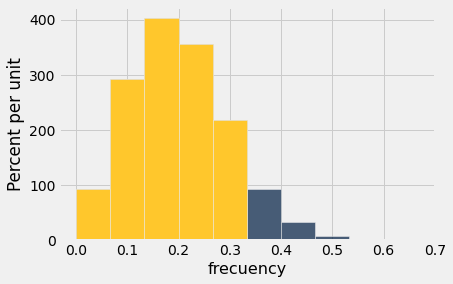

In [5]:
left_p = np.percentile(tabla.column("frecuency"),2.5)
right_p = np.percentile(tabla.column("frecuency"),93.5)
tabla.hist("frecuency",density=True, left_end=left_p, right_end=right_p)

In [6]:
tabla = bootstrap(boo_d,3, 10000)
tabla.group("frecuency").show()

frecuency,count
0,46
0.0666667,169
0.133333,563
0.2,1254
0.266667,1976
0.333333,2134
0.4,1784
0.466667,1199
0.533333,575
0.6,205


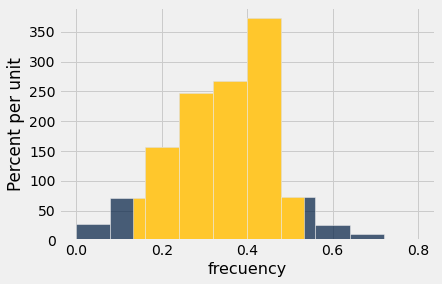

In [7]:
left_p = np.percentile(tabla.column("frecuency"),2.5)
right_p = np.percentile(tabla.column("frecuency"),93.5)
tabla.hist("frecuency",density=True, left_end=left_p, right_end=right_p)